In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import os
%matplotlib inline
plt.rcParams['figure.figsize'] = [16,5]
plt.rcParams['figure.facecolor'] = 'cornsilk'
plt.rcParams['axes.labelsize'] = 13
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.titlepad'] = 12
plt.rcParams['axes.labelpad'] = 10

### Data Importing

In [ ]:
datadir = r"C:\Users\srush\bike share model\Data_JC_2022"
#creating dataframe to store data from 2017 through 2023
os.chdir(datadir)
data=pd.DataFrame()
for i, file_name in enumerate(os.listdir()):
    if file_name.endswith(".csv"):
        t = pd.read_csv(file_name)
        data = pd.concat([data, t], axis=0, ignore_index=True)

In [ ]:
pdirectory = r"C:\Users\srush\bike share model\Data_JC_2022\New_Format"
os.chdir(pdirectory)
data2 = pd.DataFrame()
for i, file_name in enumerate(os.listdir()):
    if file_name.endswith(".csv"):
        t = pd.read_csv(file_name)
        data2 = pd.concat([data2, t], axis=0, ignore_index=True)

In [ ]:
pdirectory = r"C:\Users\srush\bike share model\Data_JC_2022\New_Format\New"
os.chdir(pdirectory)
data3 = pd.DataFrame()
for i, file_name in enumerate(os.listdir()):
    if file_name.endswith(".csv"):
        t = pd.read_csv(file_name)
        data3 = pd.concat([data3, t], axis=0, ignore_index=True)

In [ ]:
data3.columns

Index(['Trip Duration', 'Start Time', 'Stop Time', 'Start Station ID',
       'Start Station Name', 'Start Station Latitude',
       'Start Station Longitude', 'End Station ID', 'End Station Name',
       'End Station Latitude', 'End Station Longitude', 'Bike ID', 'User Type',
       'Birth Year', 'Gender'],
      dtype='object')

In [ ]:
data3.rename(columns={'Bike ID': 'ride_id'}, inplace=True)

In [ ]:
data3.tail()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,ride_id,User Type,Birth Year,Gender
39148,239,2017-03-31 21:26:40,2017-03-31 21:30:39,3195,Sip Ave,40.730743,-74.063784,3201,Dey St,40.737711,-74.066921,29276,Subscriber,1970.0,1
39149,192,2017-03-31 21:46:57,2017-03-31 21:50:09,3183,Exchange Place,40.716247,-74.033459,3267,Morris Canal,40.712419,-74.038526,26177,Subscriber,1976.0,1
39150,186,2017-03-31 22:03:56,2017-03-31 22:07:02,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,26240,Subscriber,1956.0,1
39151,618,2017-03-31 23:20:14,2017-03-31 23:30:32,3272,Jersey & 3rd,40.723332,-74.045953,3268,Lafayette Park,40.713464,-74.062859,24398,Subscriber,1984.0,1
39152,649,2017-03-31 23:25:34,2017-03-31 23:36:23,3185,City Hall,40.717732,-74.043845,3190,Garfield Ave Station,40.710467,-74.070039,26200,Subscriber,1988.0,1


In [ ]:
data2.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [ ]:
data2.rename(columns={'bikeid': 'ride_id'}, inplace=True)

In [ ]:
data2.tail()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,ride_id,usertype,birth year,gender
1363035,2476,2021-01-31 20:16:05.4700,2021-01-31 20:57:22.0110,3187,Warren St,40.721124,-74.038051,3483,Montgomery St,40.719420,-74.050990,44852,Subscriber,1958.0,1
1363036,147,2021-01-31 21:05:05.2090,2021-01-31 21:07:32.8660,3186,Grove St PATH,40.719586,-74.043117,3187,Warren St,40.721124,-74.038051,46538,Subscriber,1972.0,1
1363037,660,2021-01-31 21:06:23.5880,2021-01-31 21:17:23.8420,3211,Newark Ave,40.721525,-74.046305,3276,Marin Light Rail,40.714584,-74.042817,44398,Subscriber,1987.0,2
1363038,384,2021-01-31 21:16:37.8220,2021-01-31 21:23:02.1240,3205,JC Medical Center,40.716540,-74.049638,3268,Lafayette Park,40.713464,-74.062859,41400,Subscriber,1989.0,1
1363039,356,2021-01-31 23:24:50.8810,2021-01-31 23:30:47.3030,3639,Harborside,40.719252,-74.034234,3186,Grove St PATH,40.719586,-74.043117,43766,Subscriber,1994.0,1


In [ ]:
data.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [ ]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,121DD7DD23CB1335,docked_bike,2021-02-03 23:11:28,2021-02-03 23:18:28,Hoboken Ave at Monmouth St,JC105,Christ Hospital,JC034,40.735208,-74.046964,40.734786,-74.050444,member
1,FD73FB85F008349D,docked_bike,2021-02-27 16:34:05,2021-02-27 16:56:40,Newport Pkwy,JC008,Marin Light Rail,JC013,40.728744,-74.032108,40.714584,-74.042817,member
2,39F9E6663CB5FDF6,docked_bike,2021-02-26 23:16:04,2021-02-26 23:22:25,Journal Square,JC103,Baldwin at Montgomery,JC020,40.733670,-74.062500,40.723659,-74.064194,member
3,A64745CB0792EC6F,docked_bike,2021-02-24 16:51:50,2021-02-24 17:16:09,Hoboken Ave at Monmouth St,JC105,Hoboken Ave at Monmouth St,JC105,40.735208,-74.046963,40.735208,-74.046964,casual
4,75CC76EB9543764A,docked_bike,2021-02-24 20:44:16,2021-02-24 20:44:46,Hoboken Ave at Monmouth St,JC105,Hoboken Ave at Monmouth St,JC105,40.735208,-74.046963,40.735208,-74.046964,member


In [ ]:
# Drop the columns that are not present in all datasets from 2017 to 2023
data2.drop(columns=['tripduration','birth year', 'gender'],inplace=True)
data3.drop(columns=['Trip Duration','Birth Year', 'Gender'],inplace=True)

In [ ]:
#Setting the order of columns
desired_column_order=['ride_id','starttime', 'stoptime','start station name','start station id', 'end station name','end station id','start station latitude','start station longitude','end station latitude', 'end station longitude','usertype']
desired_column_order2=['ride_id','Start Time', 'Stop Time','Start Station Name','Start Station ID', 'End Station Name','End Station ID','Start Station Latitude','Start Station Longitude','End Station Latitude', 'End Station Longitude','User Type']

In [ ]:
data3=data3[desired_column_order2]
data2=data2[desired_column_order]

In [ ]:
data3.head()

,ride_id,Start Time,Stop Time,Start Station Name,Start Station ID,End Station Name,End Station ID,Start Station Latitude,Start Station Longitude,End Station Latitude,End Station Longitude,User Type
0,24575,2017-01-01 00:21:32,2017-01-01 00:24:01,Marin Light Rail,3276,City Hall,3185,40.714584,-74.042817,40.717732,-74.043845,Subscriber
1,24723,2017-01-01 00:24:35,2017-01-01 00:45:58,Exchange Place,3183,Heights Elevator,3198,40.716247,-74.033459,40.748716,-74.040443,Subscriber
2,24620,2017-01-01 00:38:19,2017-01-01 00:44:31,Exchange Place,3183,Newark Ave,3211,40.716247,-74.033459,40.721525,-74.046305,Subscriber
3,24668,2017-01-01 00:38:37,2017-01-01 01:03:50,McGinley Square,3194,Danforth Light Rail,3271,40.725340,-74.067622,40.692640,-74.088012,Subscriber
4,26167,2017-01-01 01:47:52,2017-01-01 01:58:31,Exchange Place,3183,Hamilton Park,3203,40.716247,-74.033459,40.727596,-74.044247,Subscriber


In [ ]:
data2.head()

,ride_id,starttime,stoptime,start station name,start station id,end station name,end station id,start station latitude,start station longitude,end station latitude,end station longitude,usertype
0,26238,2017-04-01 00:14:36,2017-04-01 00:18:48,Grove St PATH,3186,Hamilton Park,3203,40.719586,-74.043117,40.727596,-74.044247,Subscriber
1,26186,2017-04-01 00:15:47,2017-04-01 00:23:20,Hamilton Park,3203,Van Vorst Park,3213,40.727596,-74.044247,40.718489,-74.047727,Subscriber
2,24659,2017-04-01 00:46:27,2017-04-01 00:54:13,Danforth Light Rail,3271,Columbia Park,3216,40.692640,-74.088012,40.697030,-74.096937,Subscriber
3,24471,2017-04-01 00:47:15,2017-04-01 00:54:13,Danforth Light Rail,3271,Columbia Park,3216,40.692640,-74.088012,40.697030,-74.096937,Subscriber
4,24624,2017-04-01 01:13:12,2017-04-01 01:19:44,Exchange Place,3183,Newport PATH,3202,40.716247,-74.033459,40.727224,-74.033759,Subscriber


In [ ]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,121DD7DD23CB1335,docked_bike,2021-02-03 23:11:28,2021-02-03 23:18:28,Hoboken Ave at Monmouth St,JC105,Christ Hospital,JC034,40.735208,-74.046964,40.734786,-74.050444,member
1,FD73FB85F008349D,docked_bike,2021-02-27 16:34:05,2021-02-27 16:56:40,Newport Pkwy,JC008,Marin Light Rail,JC013,40.728744,-74.032108,40.714584,-74.042817,member
2,39F9E6663CB5FDF6,docked_bike,2021-02-26 23:16:04,2021-02-26 23:22:25,Journal Square,JC103,Baldwin at Montgomery,JC020,40.733670,-74.062500,40.723659,-74.064194,member
3,A64745CB0792EC6F,docked_bike,2021-02-24 16:51:50,2021-02-24 17:16:09,Hoboken Ave at Monmouth St,JC105,Hoboken Ave at Monmouth St,JC105,40.735208,-74.046963,40.735208,-74.046964,casual
4,75CC76EB9543764A,docked_bike,2021-02-24 20:44:16,2021-02-24 20:44:46,Hoboken Ave at Monmouth St,JC105,Hoboken Ave at Monmouth St,JC105,40.735208,-74.046963,40.735208,-74.046964,member


In [ ]:
data.drop(columns=['rideable_type'],inplace=True)
#data2.drop(columns='bikeid',inplace=True)
#data3.drop(columns='Bike ID',inplace=True)

In [ ]:
data2.columns=data.columns
data3.columns=data.columns

In [ ]:
#Merging all the data into a single dataframe
bike_data=pd.concat([data,data2,data3],axis=0)
bike_data['started_at'] = pd.to_datetime(bike_data['started_at'], errors='coerce')
bike_data['ended_at'] = pd.to_datetime(bike_data['ended_at'], errors='coerce')

In [ ]:
dir=r"C:\Users\srush\bike share model"
os.chdir(dir)
bike_data.to_pickle('All_Rides.pkl')

In [6]:
df = pd.read_pickle(r'C:\Users\srush\bike share model\cleaned&merged_data\All_Rides.pkl')
df.head()

,ride_id,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,121DD7DD23CB1335,2021-02-03 23:11:28,2021-02-03 23:18:28,Hoboken Ave at Monmouth St,JC105,Christ Hospital,JC034,40.735208,-74.046964,40.734786,-74.050444,member
1,FD73FB85F008349D,2021-02-27 16:34:05,2021-02-27 16:56:40,Newport Pkwy,JC008,Marin Light Rail,JC013,40.728744,-74.032108,40.714584,-74.042817,member
2,39F9E6663CB5FDF6,2021-02-26 23:16:04,2021-02-26 23:22:25,Journal Square,JC103,Baldwin at Montgomery,JC020,40.733670,-74.062500,40.723659,-74.064194,member
3,A64745CB0792EC6F,2021-02-24 16:51:50,2021-02-24 17:16:09,Hoboken Ave at Monmouth St,JC105,Hoboken Ave at Monmouth St,JC105,40.735208,-74.046963,40.735208,-74.046964,casual
4,75CC76EB9543764A,2021-02-24 20:44:16,2021-02-24 20:44:46,Hoboken Ave at Monmouth St,JC105,Hoboken Ave at Monmouth St,JC105,40.735208,-74.046963,40.735208,-74.046964,member


In [7]:
df.shape

(3687438, 12)

### Data Cleaning

In [8]:
#Number of datapoints without start station ID
missing_values = df['start_station_id'].isna().sum()
print(f"Number of missing values in start_station_id: {missing_values}")

Number of missing values in start_station_id: 77


In [9]:
#Number of datapoints without end station ID
missing_values = df['end_station_id'].isna().sum()
print(f"Number of missing values in end_station_id: {missing_values}")

Number of missing values in end_station_id: 9168


In [10]:
#Dropping the station id's with missing information
df.dropna(subset=['start_station_id'], inplace=True)
df.dropna(subset=['end_station_id'], inplace=True)

In [11]:
#Different types of members
df['member_casual'].unique()

array(['member', 'casual', 'Subscriber', 'Customer', nan], dtype=object)

In [12]:
df['member_casual'] = np.where((df['member_casual'] == 'casual') | (df['member_casual'] == 'Customer'), 'casual', df['member_casual'])
df['member_casual'] = np.where((df['member_casual'] == 'member') | (df['member_casual'] == 'Subscriber'), 'member', df['member_casual'])

In [13]:
#Using haversine distance to calculate distance between start and end station using latitude and longitude
def haversine_distance(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0

    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Differences in coordinates
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Haversine formula
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    distance = R * c

    return distance

In [14]:
# Calculate distance for each row
df['distance'] = df.apply(lambda row: haversine_distance(row['start_lat'], row['start_lng'], row['end_lat'], row['end_lng']), axis=1)

In [15]:
#Identifying outliers in distance - high standard deviation
mean_distance = df['distance'].mean()
std_distance = df['distance'].std()

# Filter values that are more than 3 standard deviations from the mean
large_values = df[df['distance'] > mean_distance + 3 * std_distance]
large_values

,ride_id,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance
113588,26170,2017-08-01 17:37:54,2017-08-01 18:07:15,Exchange Place,3183,JSQ Don't Use,3215,40.716247,-74.033459,0.0,0.0,member,8669.413473
113590,29485,2017-08-01 17:38:40,2017-08-01 17:51:30,Newport PATH,3202,JSQ Don't Use,3215,40.727224,-74.033759,0.0,0.0,member,8669.662286
113817,29443,2017-08-01 19:01:43,2017-08-01 19:09:53,Sip Ave,3195,JSQ Don't Use,3215,40.730743,-74.063784,0.0,0.0,member,8672.221170
113844,29573,2017-08-01 19:10:23,2017-08-01 19:20:14,Sip Ave,3195,JSQ Don't Use,3215,40.730743,-74.063784,0.0,0.0,member,8672.221170
114626,29236,2017-08-02 11:04:32,2017-08-02 11:23:30,Brunswick & 6th,3269,JSQ Don't Use,3215,40.726012,-74.050389,0.0,0.0,member,8671.015166
...,...,...,...,...,...,...,...,...,...,...,...,...,...
182811,26163,2017-10-02 12:44:49,2017-10-02 12:50:06,Marin Light Rail,3276,WS Don't Use,3480,40.714584,-74.042817,0.0,0.0,member,8670.154906
182833,31689,2017-10-02 13:25:34,2017-10-02 13:55:36,Van Vorst Park,3213,WS Don't Use,3480,40.718489,-74.047727,0.0,0.0,member,8670.641273
1172587,40831,NaT,NaT,Grove St PATH,3186,Liberty State Park,3475,40.719586,-74.043117,0.0,0.0,member,8670.281780
1176726,44683,NaT,NaT,Jackson Square,3694,Liberty State Park,3475,40.711130,-74.078900,0.0,0.0,member,8673.074365


In [16]:
# Extract unique end stations from the large_values dataframe
unique_start_stations = large_values['start_station_name'].unique()

# Extract unique end stations from the large_values dataframe
unique_end_stations = large_values['end_station_name'].unique()

print("Start Stations:", unique_start_stations)
print("End Stations:", unique_end_stations)
print("Number of Start Stations:", len(unique_start_stations))
print("Number of End Stations:", len(unique_end_stations))

Start Stations: ['Exchange Place' 'Newport PATH' 'Sip Ave' 'Brunswick & 6th'
 'Brunswick St' 'Oakland Ave' 'Newport Pkwy' 'Riverview Park'
 'Pershing Field' 'Hilltop' 'Monmouth and 6th' 'Heights Elevator'
 '5 Corners Library' 'Paulus Hook' 'Marin Light Rail' 'Essex Light Rail'
 'Grove St PATH' 'Lafayette Park' 'Columbus Drive' 'Jersey & 3rd'
 'Baldwin at Montgomery' 'Dey St' 'McGinley Square' 'Newark Ave' 'York St'
 'Leonard Gordon Park' 'Van Vorst Park' 'Hamilton Park' 'Christ Hospital'
 'Dixon Mills' 'Warren St' 'Astor Place' 'Liberty Light Rail' 'Union St'
 'Lincoln Park' 'Jersey & 6th St' 'Manila & 1st' 'City Hall'
 'Morris Canal' 'JC Medical Center' 'Jackson Square']
End Stations: ["JSQ Don't Use" "WS Don't Use" 'Liberty State Park' 'Indiana']
Number of Start Stations: 41
Number of End Stations: 4


In [17]:
stations_to_remove = list(unique_start_stations) + list(unique_end_stations)
large_values_df= df[~(df['start_station_name'].isin(stations_to_remove) | df['end_station_name'].isin(stations_to_remove))]

In [18]:
stations_to_remove = ["WS Don't Use", "JSQ Don't Use"]

# Filter out rows where 'start_station_name' or 'end_station_name' is in stations_to_remove
df = df[~df['start_station_name'].isin(stations_to_remove)]
df = df[~df['end_station_name'].isin(stations_to_remove)]

In [19]:
df['start_date']=df['started_at'].dt.date
df['end_date']=df['ended_at'].dt.date

In [20]:
df['start_time']=df['started_at'].dt.time
df['end_time']=df['ended_at'].dt.time

In [21]:
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])

In [22]:
#Calculating duration
df['duration'] = ((df['ended_at'] - df['started_at']).dt.total_seconds() / 60).round(2)

In [23]:
has_negative_values = (df['duration'] < 0).sum()
has_negative_values

79

In [24]:
df = df[df['duration'] >= 0]

In [ ]:
weather_df = pd.read_pickle('WeatherData_2017-2023.pkl')

In [ ]:
weather_df = weather_df[['DATE','TEMP','VISIB','WDSP','MAX','MIN','PRCP']]

In [ ]:
weather_df

,DATE,TEMP,VISIB,WDSP,MAX,MIN,PRCP
0,2017-01-01,46.1,999.9,7.4,53.6,33.1,0.02
1,2017-01-02,41.2,999.9,8.2,53.1,39.2,0.04
2,2017-01-03,41.7,999.9,15.7,44.6,39.2,0.13
3,2017-01-04,45.6,999.9,8.8,53.6,39.9,0.23
4,2017-01-05,33.8,999.9,12.5,53.1,28.0,0.13
...,...,...,...,...,...,...,...
2148,2023-10-24,58.5,9.8,4.4,66.9,48.9,0.00
2149,2023-10-25,61.6,10.0,6.3,75.0,52.0,0.00
2150,2023-10-26,67.6,10.0,4.8,82.0,53.1,0.00
2151,2023-10-27,66.9,10.0,4.6,82.0,57.9,0.00


In [ ]:
weather_df['DATE'] = pd.to_datetime(weather_df['DATE'])
merged___df = pd.merge(df, weather_df, left_on='start_date', right_on='DATE', how='left')

In [ ]:
merged___df

,ride_id,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,...,start_time,end_time,duration,DATE,TEMP,VISIB,WDSP,MAX,MIN,PRCP
0,121DD7DD23CB1335,2021-02-03 23:11:28,2021-02-03 23:18:28,Hoboken Ave at Monmouth St,JC105,Christ Hospital,JC034,40.735208,-74.046964,40.734786,...,23:11:28,23:18:28,7.00,2021-02-03,33.9,9.5,2.9,39.0,30.0,0.01
1,FD73FB85F008349D,2021-02-27 16:34:05,2021-02-27 16:56:40,Newport Pkwy,JC008,Marin Light Rail,JC013,40.728744,-74.032108,40.714584,...,16:34:05,16:56:40,22.58,2021-02-27,43.4,8.1,7.1,50.0,35.1,0.01
2,39F9E6663CB5FDF6,2021-02-26 23:16:04,2021-02-26 23:22:25,Journal Square,JC103,Baldwin at Montgomery,JC020,40.733670,-74.062500,40.723659,...,23:16:04,23:22:25,6.35,2021-02-26,40.4,10.0,5.4,52.0,35.1,0.00
3,A64745CB0792EC6F,2021-02-24 16:51:50,2021-02-24 17:16:09,Hoboken Ave at Monmouth St,JC105,Hoboken Ave at Monmouth St,JC105,40.735208,-74.046963,40.735208,...,16:51:50,17:16:09,24.32,2021-02-24,45.5,10.0,5.4,55.9,35.1,0.00
4,75CC76EB9543764A,2021-02-24 20:44:16,2021-02-24 20:44:46,Hoboken Ave at Monmouth St,JC105,Hoboken Ave at Monmouth St,JC105,40.735208,-74.046963,40.735208,...,20:44:16,20:44:46,0.50,2021-02-24,45.5,10.0,5.4,55.9,35.1,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2570137,29276,2017-03-31 21:26:40,2017-03-31 21:30:39,Sip Ave,3195,Dey St,3201,40.730743,-74.063784,40.737711,...,21:26:40,21:30:39,3.98,2017-03-31,41.1,6.7,9.8,44.6,39.0,0.81
2570138,26177,2017-03-31 21:46:57,2017-03-31 21:50:09,Exchange Place,3183,Morris Canal,3267,40.716247,-74.033459,40.712419,...,21:46:57,21:50:09,3.20,2017-03-31,41.1,6.7,9.8,44.6,39.0,0.81
2570139,26240,2017-03-31 22:03:56,2017-03-31 22:07:02,Exchange Place,3183,Essex Light Rail,3214,40.716247,-74.033459,40.712774,...,22:03:56,22:07:02,3.10,2017-03-31,41.1,6.7,9.8,44.6,39.0,0.81
2570140,24398,2017-03-31 23:20:14,2017-03-31 23:30:32,Jersey & 3rd,3272,Lafayette Park,3268,40.723332,-74.045953,40.713464,...,23:20:14,23:30:32,10.30,2017-03-31,41.1,6.7,9.8,44.6,39.0,0.81


In [ ]:
merged___df.to_pickle("Merged_Data.pkl")

In [25]:
large_values_df

,ride_id,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance
3,A64745CB0792EC6F,2021-02-24 16:51:50,2021-02-24 17:16:09,Hoboken Ave at Monmouth St,JC105,Hoboken Ave at Monmouth St,JC105,40.735208,-74.046963,40.735208,-74.046964,casual,0.000076
4,75CC76EB9543764A,2021-02-24 20:44:16,2021-02-24 20:44:46,Hoboken Ave at Monmouth St,JC105,Hoboken Ave at Monmouth St,JC105,40.735208,-74.046963,40.735208,-74.046964,member,0.000076
56,CB3A510026E7B39A,2021-02-25 13:27:12,2021-02-25 14:14:54,Harborside,JC104,Hoboken Ave at Monmouth St,JC105,40.719251,-74.034234,40.735208,-74.046964,member,2.073423
99,DB3EAE5325F61F33,2021-02-19 18:12:05,2021-02-19 18:50:14,Bergen Ave,JC095,Bergen Ave,JC095,40.722103,-74.071455,40.722104,-74.071455,member,0.000087
152,0AE0BA28C6EFAA90,2021-02-21 15:52:52,2021-02-21 16:17:45,Hoboken Ave at Monmouth St,JC105,Glenwood Ave,JC094,40.735208,-74.046964,40.727551,-74.071061,member,2.201724
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37133,26184,2017-03-27 17:25:49,2017-03-27 17:32:28,Danforth Light Rail,3271,Columbia Park,3216,40.692640,-74.088012,40.697030,-74.096937,member,0.896862
37448,24648,2017-03-28 08:07:46,2017-03-28 08:13:33,Columbia Park,3216,Danforth Light Rail,3271,40.697030,-74.096937,40.692640,-74.088012,member,0.896862
37642,24648,2017-03-28 17:23:11,2017-03-28 17:28:52,Danforth Light Rail,3271,Columbia Park,3216,40.692640,-74.088012,40.697030,-74.096937,member,0.896862
37839,24471,2017-03-29 08:07:34,2017-03-29 08:12:47,Columbia Park,3216,Danforth Light Rail,3271,40.697030,-74.096937,40.692640,-74.088012,member,0.896862


In [3]:
merged_df=pd.read_pickle(r"C:\Users\srush\bike share model\cleaned&merged_data\Merged_Data_org.pkl")
merged_df

,ride_id,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,...,start_time,end_time,duration,DATE,TEMP,VISIB,WDSP,MAX,MIN,PRCP
0,121DD7DD23CB1335,2021-02-03 23:11:28,2021-02-03 23:18:28,Hoboken Ave at Monmouth St,JC105,Christ Hospital,JC034,40.735208,-74.046964,40.734786,...,23:11:28,23:18:28,7.00,2021-02-03,33.9,9.5,2.9,39.0,30.0,0.01
1,FD73FB85F008349D,2021-02-27 16:34:05,2021-02-27 16:56:40,Newport Pkwy,JC008,Marin Light Rail,JC013,40.728744,-74.032108,40.714584,...,16:34:05,16:56:40,22.58,2021-02-27,43.4,8.1,7.1,50.0,35.1,0.01
2,39F9E6663CB5FDF6,2021-02-26 23:16:04,2021-02-26 23:22:25,Journal Square,JC103,Baldwin at Montgomery,JC020,40.733670,-74.062500,40.723659,...,23:16:04,23:22:25,6.35,2021-02-26,40.4,10.0,5.4,52.0,35.1,0.00
3,A64745CB0792EC6F,2021-02-24 16:51:50,2021-02-24 17:16:09,Hoboken Ave at Monmouth St,JC105,Hoboken Ave at Monmouth St,JC105,40.735208,-74.046963,40.735208,...,16:51:50,17:16:09,24.32,2021-02-24,45.5,10.0,5.4,55.9,35.1,0.00
4,75CC76EB9543764A,2021-02-24 20:44:16,2021-02-24 20:44:46,Hoboken Ave at Monmouth St,JC105,Hoboken Ave at Monmouth St,JC105,40.735208,-74.046963,40.735208,...,20:44:16,20:44:46,0.50,2021-02-24,45.5,10.0,5.4,55.9,35.1,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3677402,29276,2017-03-31 21:26:40,2017-03-31 21:30:39,Sip Ave,3195,Dey St,3201,40.730743,-74.063784,40.737711,...,21:26:40,21:30:39,3.98,2017-03-31,41.1,6.7,9.8,44.6,39.0,0.81
3677403,26177,2017-03-31 21:46:57,2017-03-31 21:50:09,Exchange Place,3183,Morris Canal,3267,40.716247,-74.033459,40.712419,...,21:46:57,21:50:09,3.20,2017-03-31,41.1,6.7,9.8,44.6,39.0,0.81
3677404,26240,2017-03-31 22:03:56,2017-03-31 22:07:02,Exchange Place,3183,Essex Light Rail,3214,40.716247,-74.033459,40.712774,...,22:03:56,22:07:02,3.10,2017-03-31,41.1,6.7,9.8,44.6,39.0,0.81
3677405,24398,2017-03-31 23:20:14,2017-03-31 23:30:32,Jersey & 3rd,3272,Lafayette Park,3268,40.723332,-74.045953,40.713464,...,23:20:14,23:30:32,10.30,2017-03-31,41.1,6.7,9.8,44.6,39.0,0.81


### Visualization of NJ CitiBike Station Network

In [26]:
start_station_counts = large_values_df['start_station_name'].value_counts()

valid_start_stations = start_station_counts[start_station_counts > 1].index

end_station_counts = large_values_df['end_station_name'].value_counts()

valid_end_stations = end_station_counts[end_station_counts > 1].index

filtered_df = large_values_df[
    (large_values_df['start_station_name'].isin(valid_start_stations)) &
    (large_values_df['end_station_name'].isin(valid_end_stations))
]

In [27]:
# Extract unique stations and their coordinates

stations_start = filtered_df[['start_station_id','start_station_name', 'start_lat', 'start_lng']]
stations_end =  filtered_df[['end_station_id', 'end_station_name','end_lat', 'end_lng']]
stations_start.rename(columns={'start_lat': 'Latitude'}, inplace=True)
stations_start.rename(columns={'start_lng': 'Longitude'}, inplace=True)
stations_end.rename(columns={'end_lat': 'Latitude'}, inplace=True)
stations_end.rename(columns={'end_lng': 'Longitude'}, inplace=True)


C:\Users\srush\AppData\Local\Temp\ipykernel_26584\335489159.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations_start.rename(columns={'start_lat': 'Latitude'}, inplace=True)
C:\Users\srush\AppData\Local\Temp\ipykernel_26584\335489159.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations_start.rename(columns={'start_lng': 'Longitude'}, inplace=True)
C:\Users\srush\AppData\Local\Temp\ipykernel_26584\335489159.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [28]:
stations_start = stations_start.rename(columns={'start_station_id': 'station_id','start_station_name':'station_name'})
stations_end = stations_end.rename(columns={'end_station_id': 'station_id','end_station_name':'station_name'})

In [29]:
#Dataframe containing station id's and their latitude and longitude
stations = pd.concat([stations_start, stations_end])

In [30]:
stations_grouped = stations.groupby(['station_id', 'station_name'])

def get_mode(group):
    return pd.Series(group.mode().iloc[0])

result = stations_grouped.apply(get_mode).reset_index(drop=True)

In [ ]:
import folium
from IPython.display import display

jc_coords = (40.716250, -74.009106)

# Create a Folium map centered at Jersey City
map_centered = folium.Map(location=jc_coords, zoom_start=12)

for station in result.itertuples():
    folium.Marker(
        location=[station.Latitude, station.Longitude],
        popup=f"{station.station_name}",
        icon=folium.Icon(color='blue',icon='bicycle', prefix='fa')
    ).add_to(map_centered)

display(map_centered)

In [31]:
#Dictionary of positions of each station in NYC
stations.set_index('station_name',inplace=True)
stations["pos"] = list(zip(stations['Latitude'].astype(float), stations['Longitude'].astype(float)))
pos=stations.to_dict()['pos']

In [32]:
#Creating Graph object
G = nx.from_pandas_edgelist(filtered_df, 'start_station_name', 'end_station_name', edge_attr='distance')

In [33]:
# Map positions to nodes
for node, position in pos.items():
  try:
    G.nodes[node]['pos'] = position
  except KeyError:
          pass

In [34]:
len(G.nodes)

269

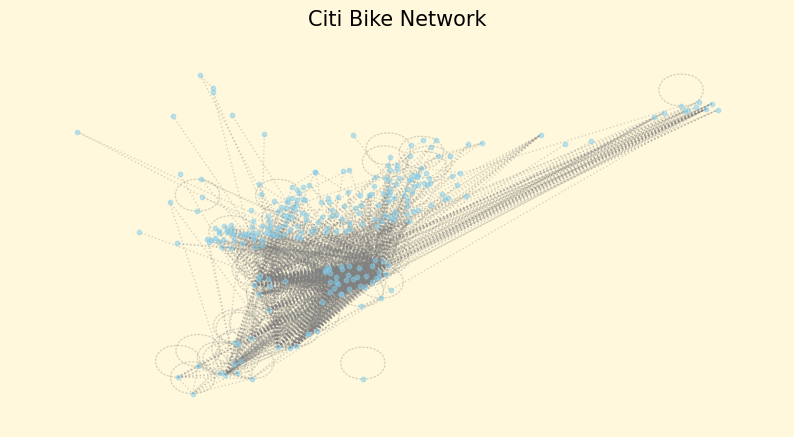

In [35]:
# Create the graph visualization
fig, ax = plt.subplots(figsize=(10,5))

# Draw the nodes and edges
nx.draw_networkx_nodes(G, pos=pos, node_color='skyblue', alpha=0.5, node_size=10)
nx.draw_networkx_edges(G, pos=pos, edge_color='grey', style="dotted", alpha=0.3, arrows=False)
#nx.draw_networkx_labels(G, pos=positions, font_size=12)

# Set the title and turn off the axis
plt.title("Citi Bike Network")
ax.axis('off')

plt.show()

### Start station - End station heatmap for all the years

In [38]:
def yearly_heatmap(year):
  #data
  df_hmap = merged_df.copy()
  df_hmap['start_date'] = pd.to_datetime(df_hmap['start_date'])
  df_hmap['end_date'] = pd.to_datetime(df_hmap['end_date'])
  filtered_data = df_hmap[df_hmap['start_date'].dt.year == year]
  # Aggregate data based on unique start and end station pairs and count occurrences
  route_frequency = filtered_data.groupby(['start_station_name', 'end_station_name']).size()
  sorted_routes = route_frequency.sort_values(ascending=False)
  # Select the top 20 routes
  top_routes = sorted_routes.head(20).index
  top_stations = set([station for route in top_routes for station in route])

  # Filter the heatmap data to only include the top stations
  heatmap_data = filtered_data[filtered_data['start_station_name'].isin(top_stations) &
                                 filtered_data['end_station_name'].isin(top_stations)]
  heatmap_data = heatmap_data.groupby(['start_station_name', 'end_station_name']).size().reset_index(name='count')

  # Pivot for heatmap
  heatmap_pivot = heatmap_data.pivot(index='start_station_name', columns='end_station_name', values='count')
  heatmap_pivot = heatmap_pivot.reindex(index=top_stations, columns=top_stations, fill_value=0)

  # Color scale
  min_value = heatmap_pivot.min().min()
  max_value = heatmap_pivot.max().max()

  # Figure
  fig, ax = plt.subplots(figsize=(12, 12))
  sns.heatmap(heatmap_pivot, vmin=min_value, vmax=max_value, square=True, annot=True, fmt="d")

  # Labeling
  ax.set_title(f'StartStation - EndStation Heatmap for {year}', fontdict={"fontsize":10}, pad=20)
  ax.set_xlabel("End Station Name", fontsize=10)
  ax.set_ylabel("Start Station Name", fontsize=10)
  plt.show()

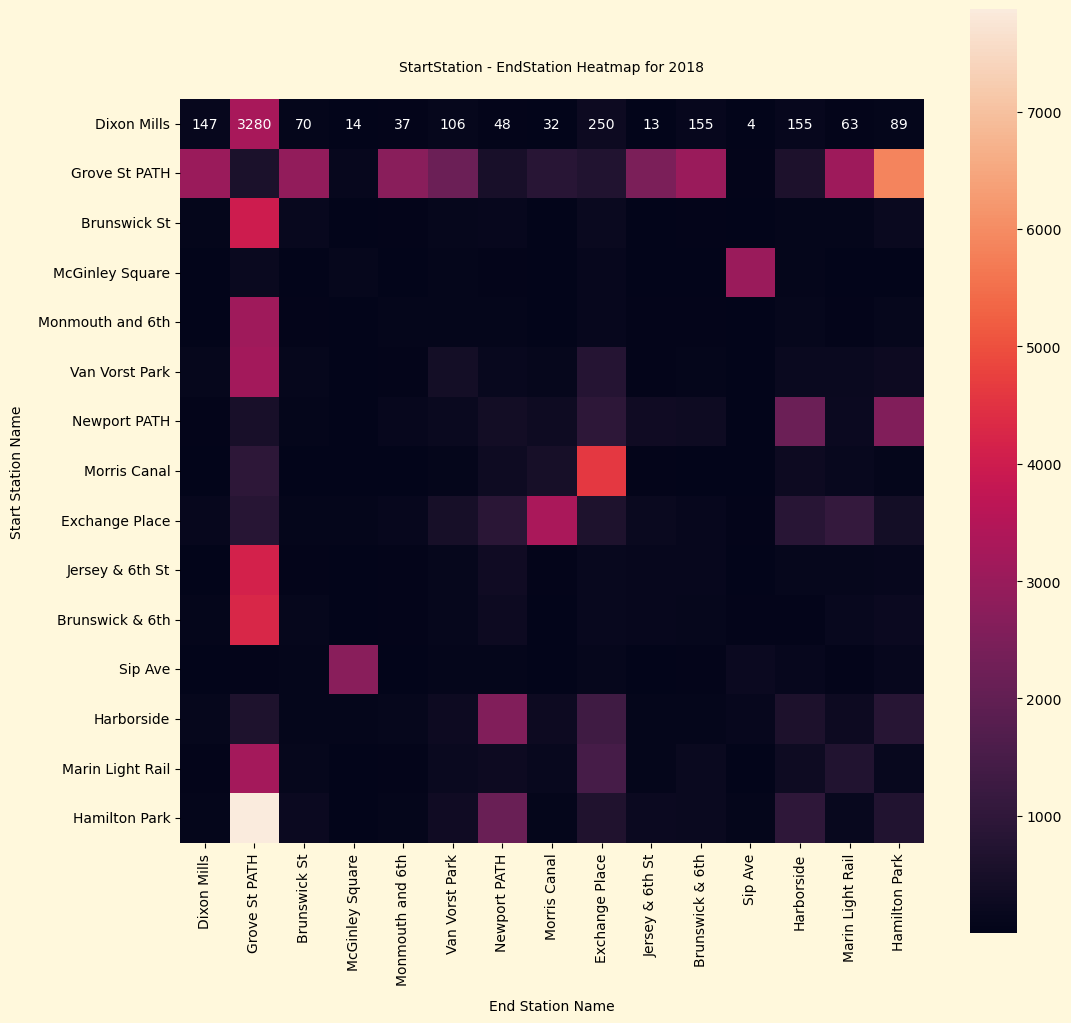

In [39]:
# heatmap for the year 2017
yearly_heatmap(2018)

### Yearly heatmap of number of trips by Day of the Week and Hour of the Day

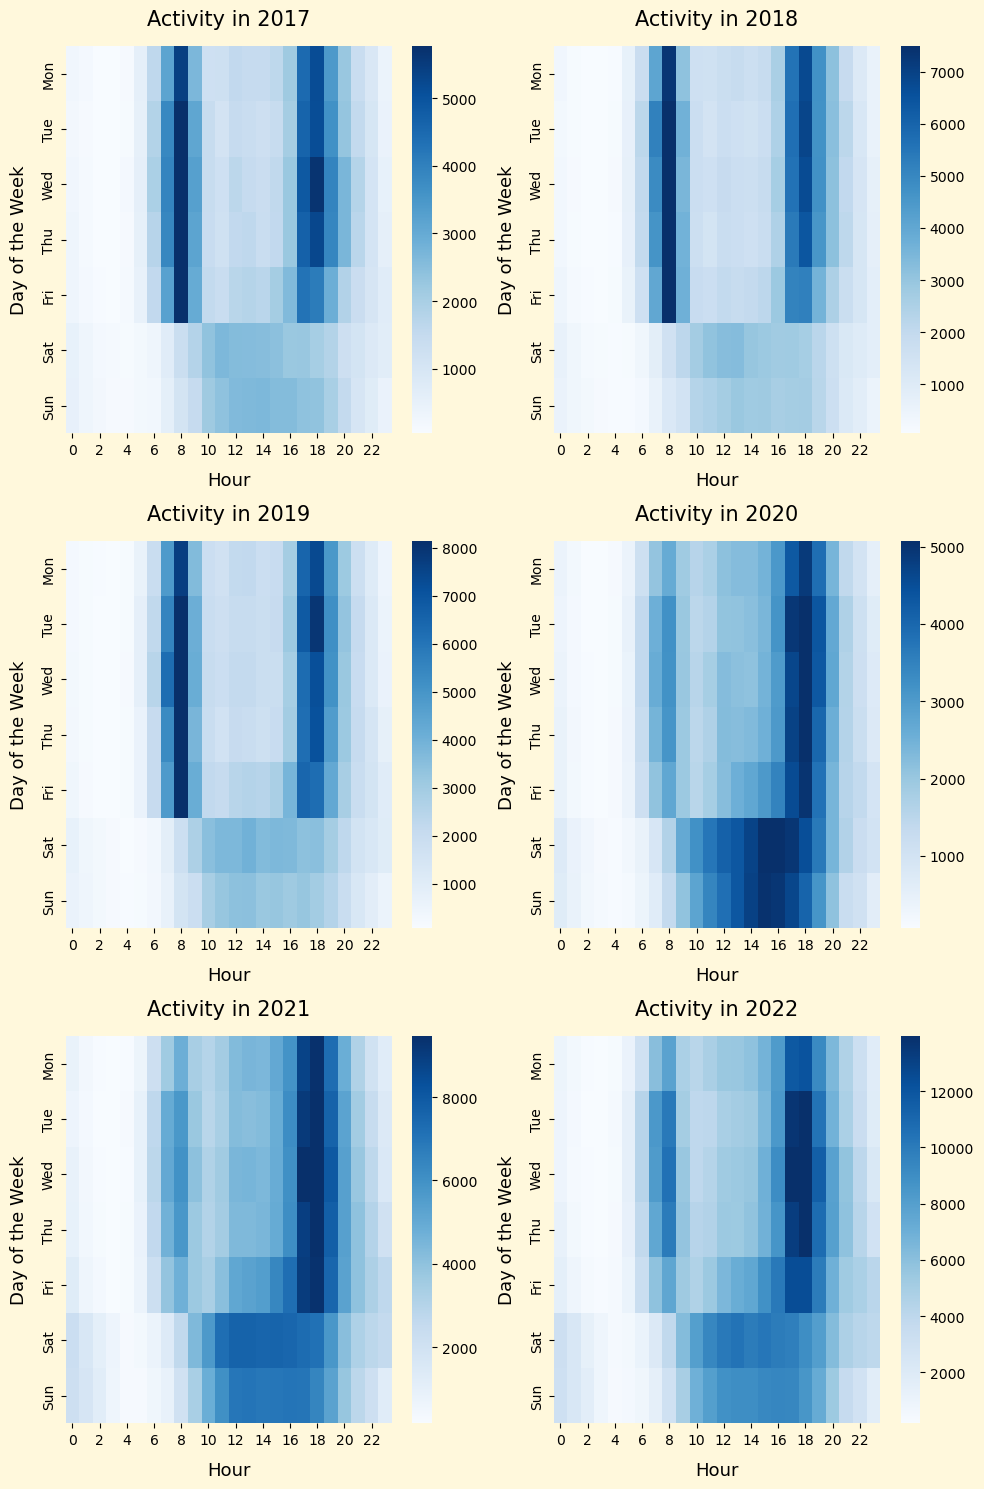

In [40]:
days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

# Extract relevant data
df_hmap = merged_df.copy()
df_hmap['start_date'] = pd.to_datetime(df_hmap['start_date'])
#df_hmap['start_time'] = pd.to_datetime(df_hmap['start_time'])
df_hmap['hourly'] = pd.DatetimeIndex(df_hmap['started_at']).hour
df_hmap['day'] = pd.DatetimeIndex(df_hmap['started_at']).weekday
yearly_data = {
    2017: df_hmap[df_hmap['start_date'].dt.year == 2017],
    2018: df_hmap[df_hmap['start_date'].dt.year == 2018],
    2019: df_hmap[df_hmap['start_date'].dt.year == 2019],
    2020: df_hmap[df_hmap['start_date'].dt.year == 2020],
    2021: df_hmap[df_hmap['start_date'].dt.year == 2021],
    2022: df_hmap[df_hmap['start_date'].dt.year == 2022]
}
activity_data = {
    year: yearly_data[year].groupby(by=['day', 'hourly']).count()['start_station_name'].unstack()
    for year in yearly_data
}
# Create visualization
visual, axes = plt.subplots(3, 2, figsize=(10, 15))
# Access each subplot using axes[row, col]
axis1 = axes[0, 0]
axis2 = axes[0, 1]
axis3 = axes[1, 0]
axis4 = axes[1, 1]
axis5 = axes[2, 0]
axis6 = axes[2, 1]
# Plotting data on each axis
sns.heatmap(activity_data[2017], ax=axis1, robust=True, cmap="Blues", yticklabels=days)
sns.heatmap(activity_data[2018], ax=axis2, robust=True, cmap="Blues", yticklabels=days)
sns.heatmap(activity_data[2019], ax=axis3, robust=True, cmap="Blues", yticklabels=days)
sns.heatmap(activity_data[2020], ax=axis4, robust=True, cmap="Blues", yticklabels=days)
sns.heatmap(activity_data[2021], ax=axis5, robust=True, cmap="Blues", yticklabels=days)
sns.heatmap(activity_data[2022], ax=axis6, robust=True, cmap="Blues", yticklabels=days)
# Setting titles and labels
titles = ["Activity in 2017", "Activity in 2018", "Activity in 2019", "Activity in 2020", "Activity in 2021", "Activity in 2022"]
for ax, title in zip([axis1, axis2, axis3, axis4, axis5, axis6], titles):
    ax.set_title(title, fontsize=15, pad=15)
    ax.set(xlabel="Hour", ylabel="Day of the Week")
plt.tight_layout()
plt.show()

### Most used Start Stations

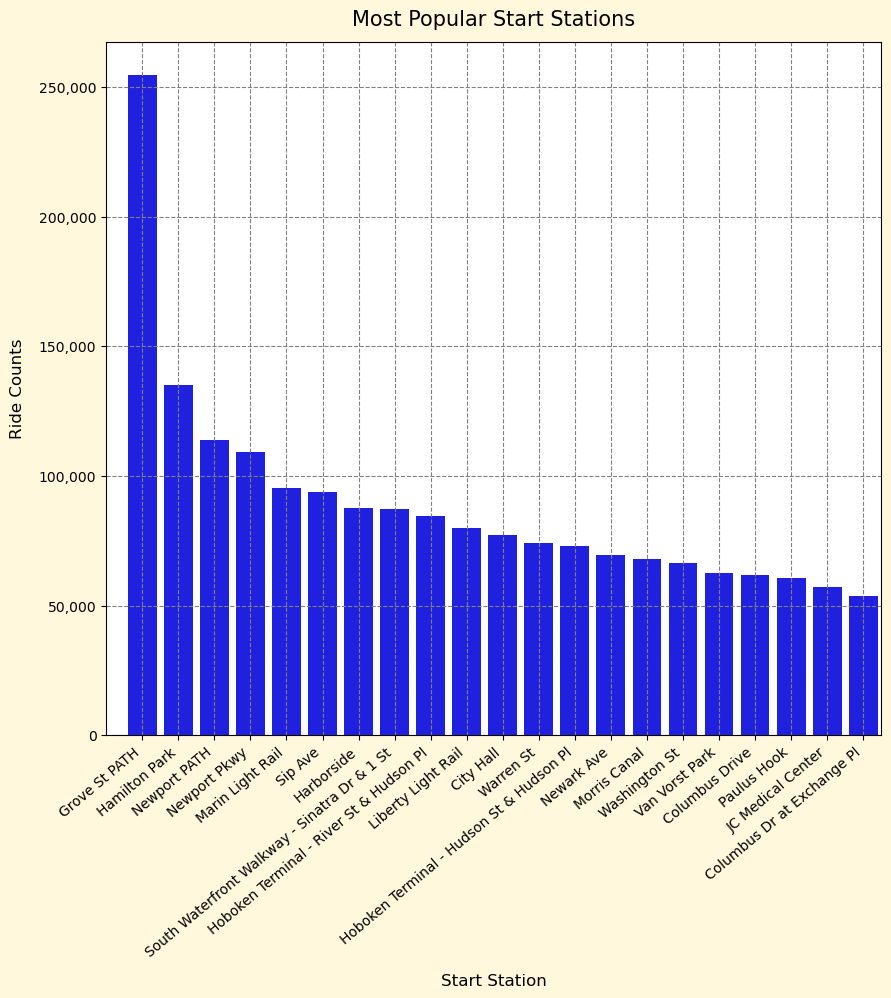

In [41]:
import matplotlib.ticker as ticker
visual = plt.figure(figsize=(10,9))
plot = sns.countplot(x="start_station_name", color='BLUE', data=merged_df, order=merged_df['start_station_name'].value_counts().index)

plot.set_xticklabels(plot.get_xticklabels(), rotation=40, ha="right")
plt.xlabel("Start Station", fontsize= 12, x = 0.5)
plt.ylabel("Ride Counts", fontsize= 12)
plt.xlim(-1,20.5)

plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Most Popular Start Stations')
plt.grid(linestyle="--", color='grey')

### Most visited End Stations

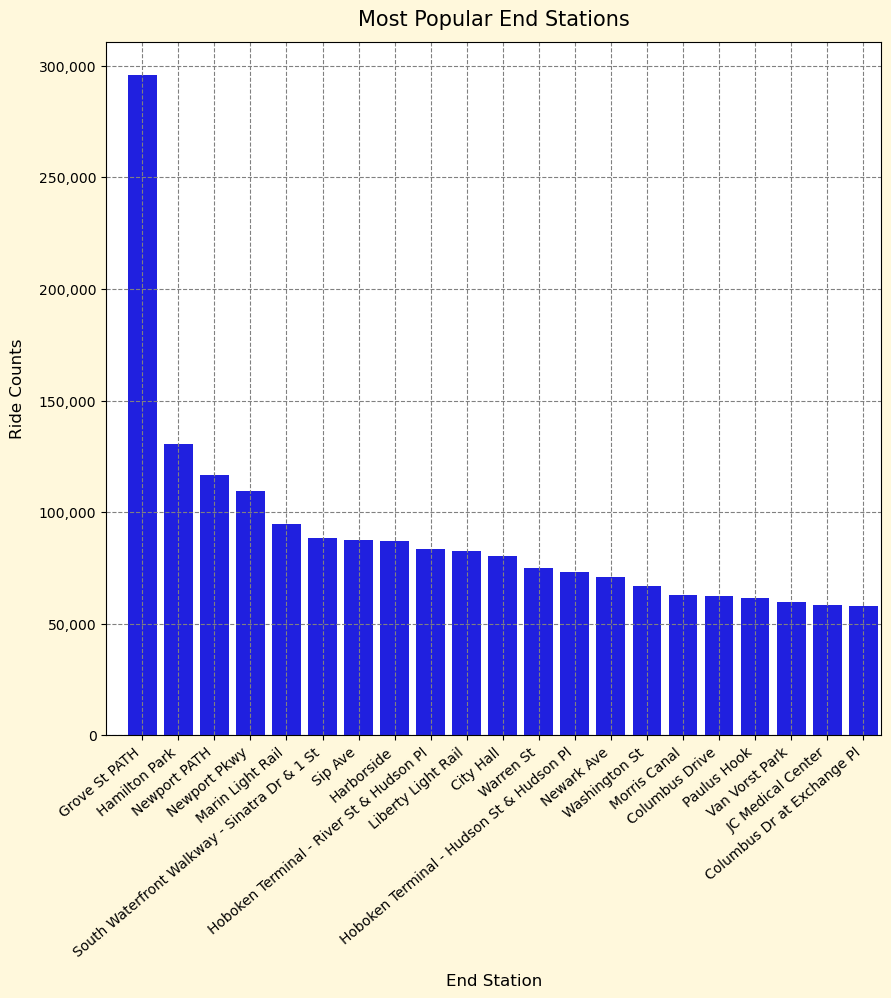

In [42]:
visual = plt.figure(figsize=(10,9))
plot = sns.countplot(x="end_station_name", color='BLUE', data=merged_df, order=merged_df['end_station_name'].value_counts().index)

# Set axis labels and properties
plot.set_xticklabels(plot.get_xticklabels(), rotation=40, ha="right")
plt.xlabel("End Station", fontsize= 12, x = 0.5)
plt.ylabel("Ride Counts", fontsize= 12)
plt.xlim(-1,20.5)

plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Most Popular End Stations')
plt.grid(linestyle="--", color='grey')


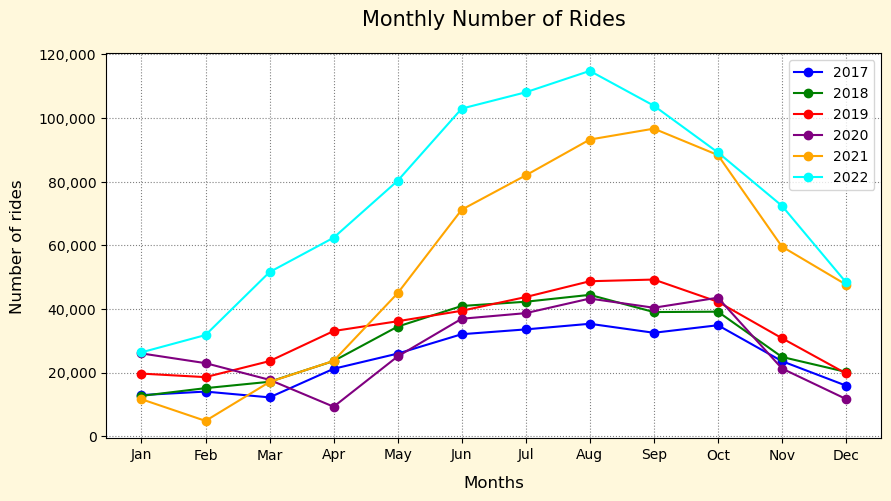

In [43]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

data_copy = merged_df.copy()
data_copy['start_date'] = pd.to_datetime(data_copy['start_date'])


yearly_data = {}
for year in range(2017, 2023):
    yearly_df = data_copy[data_copy['start_date'].dt.year == year].copy()
    #yearly_df = data_copy[data_copy['start_date'].dt.year == year]
    yearly_df.loc[:, 'month'] = yearly_df['start_date'].dt.month
    yearly_data[year] = yearly_df.groupby('month').size().reset_index(name='count')


fig, ax = plt.subplots(figsize=(10,5))

colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']
for year, color in zip(range(2017, 2023), colors):
    plt.plot(yearly_data[year]["month"], yearly_data[year]["count"], color=color, marker='o')


ax.set_title("Monthly Number of Rides", fontsize=15, pad=20)
ax.set_ylabel("Number of rides", fontsize=12)
ax.set_xlabel("Months", fontsize=12)
plt.grid(linestyle=":", color='grey')
plt.legend(["2017", "2018", "2019", "2020", "2021", "2022"])
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

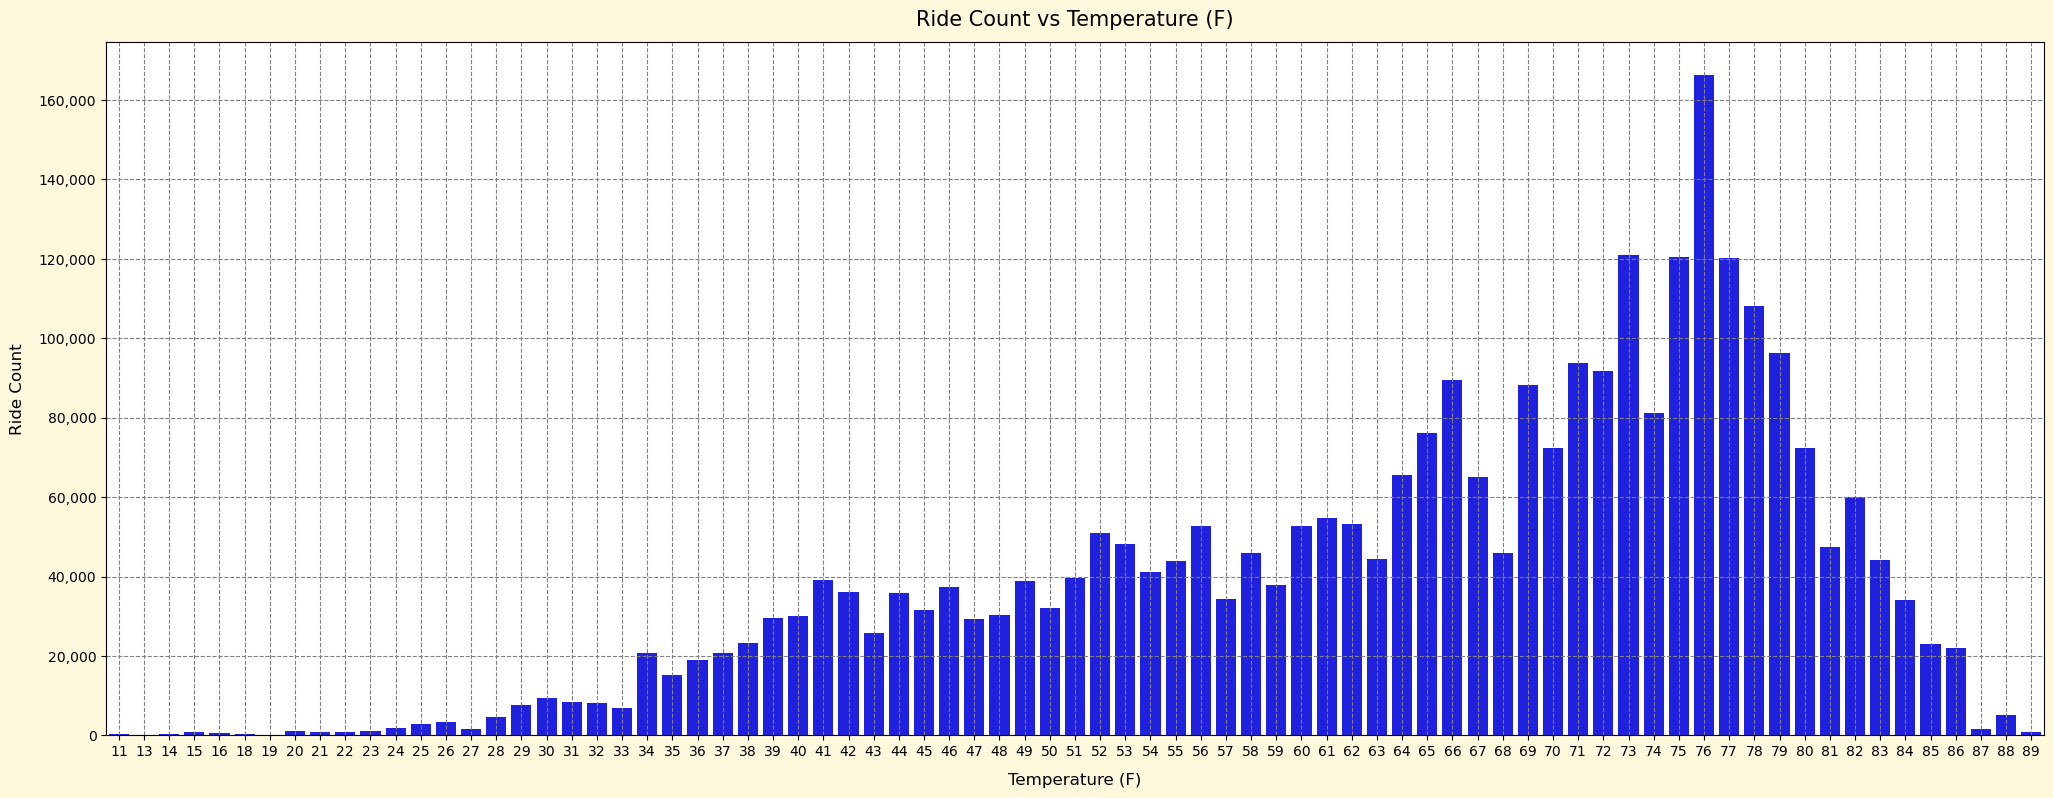

In [44]:
import matplotlib.ticker as ticker
df_copy = merged_df.copy()
df_copy.dropna(inplace=True)
df_copy["TEMP"] = df_copy["TEMP"].astype(int)

plot_fig, plot_ax = plt.subplots(figsize=(25,9))
plot_ax = sns.countplot(x="TEMP", data=df_copy, color='BLUE')

plot_ax.set_xlabel("Temperature (F)", fontsize=12)
plot_ax.set_ylabel("Ride Count", fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plot_ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title ('Ride Count vs Temperature (F)')

plot_ax.grid(linestyle="--", color='gray')

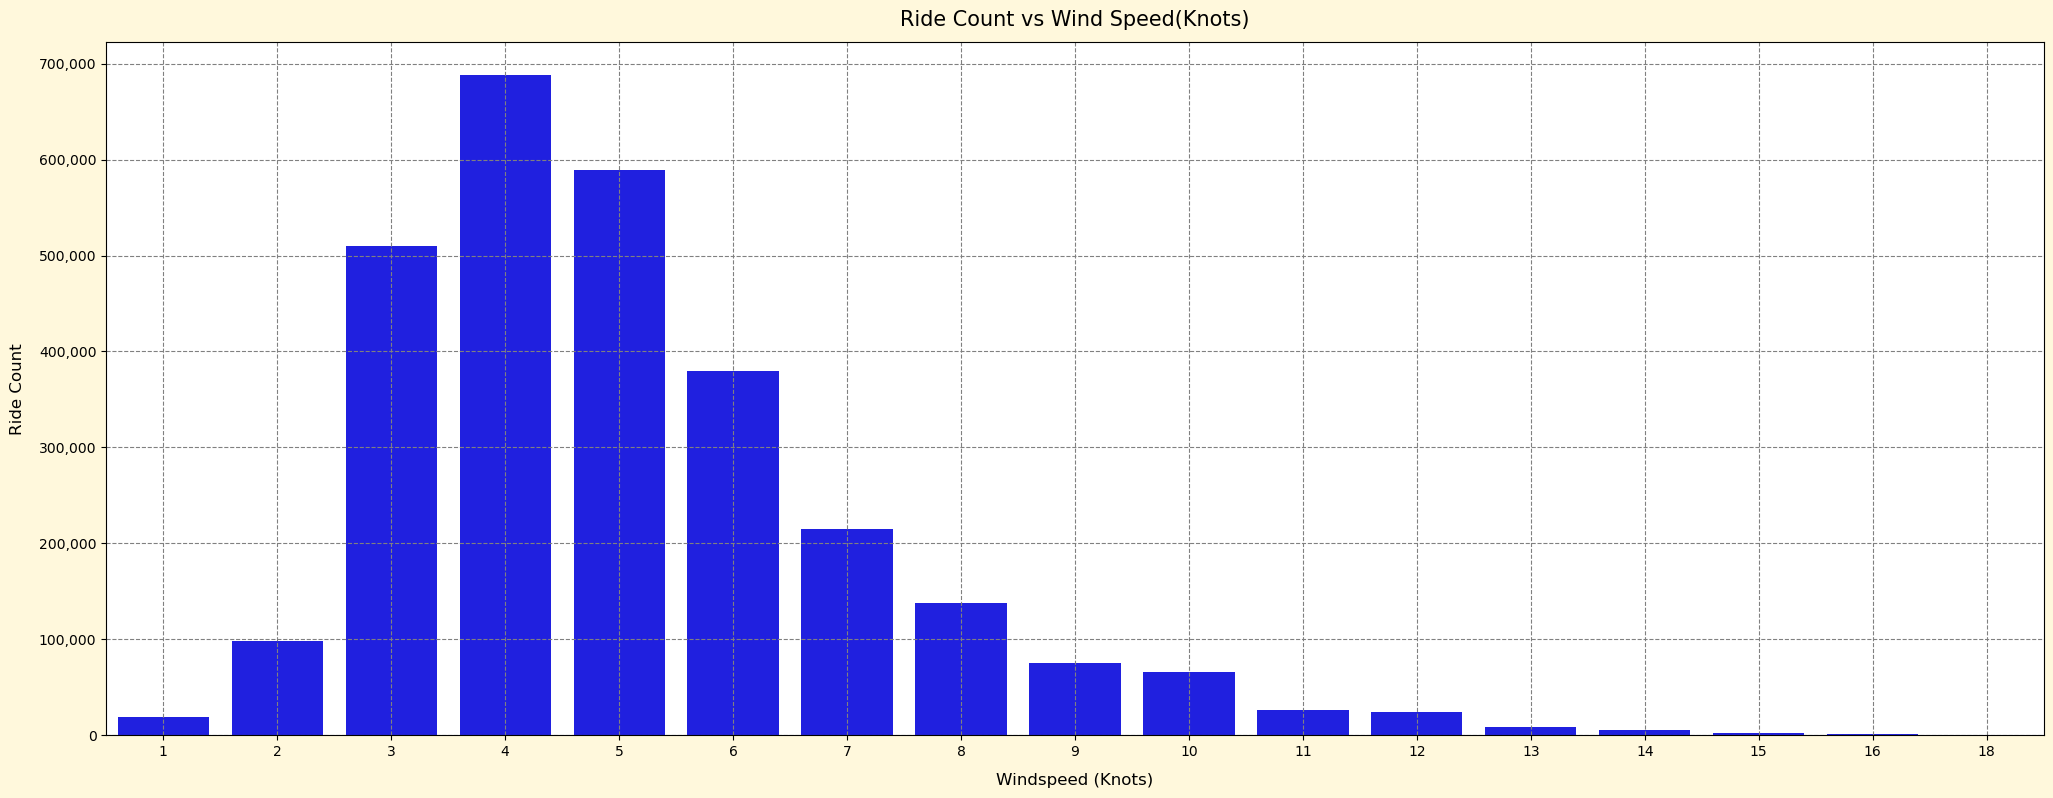

In [45]:
import matplotlib.ticker as ticker
df_copy = merged_df.copy()
df_copy.dropna(inplace=True)
df_copy["WDSP"] = df_copy["WDSP"].astype(int)

# Remove rows with 'WDSP' equal to 999.9
df_copy = df_copy[df_copy["WDSP"] != 999]

# Visualization
plot_fig, plot_ax = plt.subplots(figsize=(25,9))
plot_ax = sns.countplot(x="WDSP", data=df_copy, color='BLUE')

# Setting axis labels
plot_ax.set_xlabel("Windspeed (Knots)", fontsize=12)
plot_ax.set_ylabel("Ride Count", fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plot_ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Ride Count vs Wind Speed(Knots)')

# Adding grid lines
plot_ax.grid(linestyle="--", color='gray')

In [46]:
#Calculating total number of rides per day across all stations
df_daily = merged_df.copy()
df_c = df_daily.groupby('start_date').size().reset_index(name='count')
df_c['start_date'] = pd.to_datetime(df_c['start_date'])
df_c.head()

,start_date,count
0,2017-01-01,272
1,2017-01-02,144
2,2017-01-03,348
3,2017-01-04,634
4,2017-01-05,552


In [47]:
df_c["Year"] = pd.DatetimeIndex(df_c["start_date"]).year
df_c["Month"] = pd.DatetimeIndex(df_c["start_date"]).month
df_c["Week"] = pd.DatetimeIndex(df_c["start_date"]).isocalendar().week
df_c["Day"] = pd.DatetimeIndex(df_c["start_date"]).day
df_c["Day of Week"] = pd.DatetimeIndex(df_c["start_date"]).dayofweek
df_c["Day of Year"] = pd.DatetimeIndex(df_c["start_date"]).dayofyear

In [48]:
df_c.head()

,start_date,count,Year,Month,Week,Day,Day of Week,Day of Year
0,2017-01-01,272,2017,1,<NA>,1,6,1
1,2017-01-02,144,2017,1,<NA>,2,0,2
2,2017-01-03,348,2017,1,<NA>,3,1,3
3,2017-01-04,634,2017,1,<NA>,4,2,4
4,2017-01-05,552,2017,1,<NA>,5,3,5


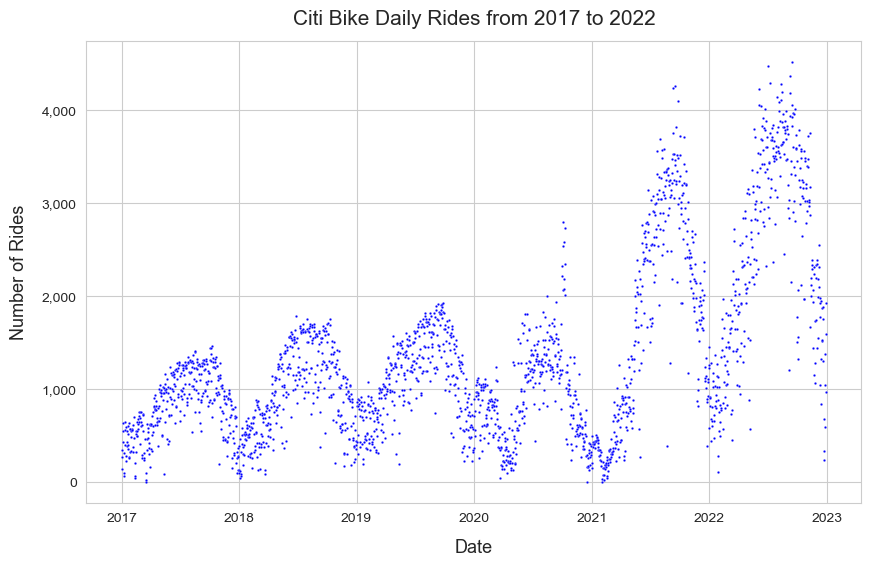

In [54]:
# Convert 'start_date' to datetime format if it's not already
df_c["start_date"] = pd.to_datetime(df_c["start_date"])

# Filter the dataframe to include only data from 2017 to 2022
filtered_df = df_c[(df_c["start_date"].dt.year >= 2017) & (df_c["start_date"].dt.year <= 2022)]

# Set the style of seaborn
#sns.set_style("whitegrid")

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data using seaborn's scatterplot function
sns.scatterplot(x=filtered_df["start_date"], y=filtered_df["count"], color="blue", s=3, ax=ax)

# Set the title and axis labels
ax.set_title("Citi Bike Daily Rides from 2017 to 2022")
ax.set_xlabel("Date")
ax.set_ylabel("Number of Rides")

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Display the plot
plt.show()

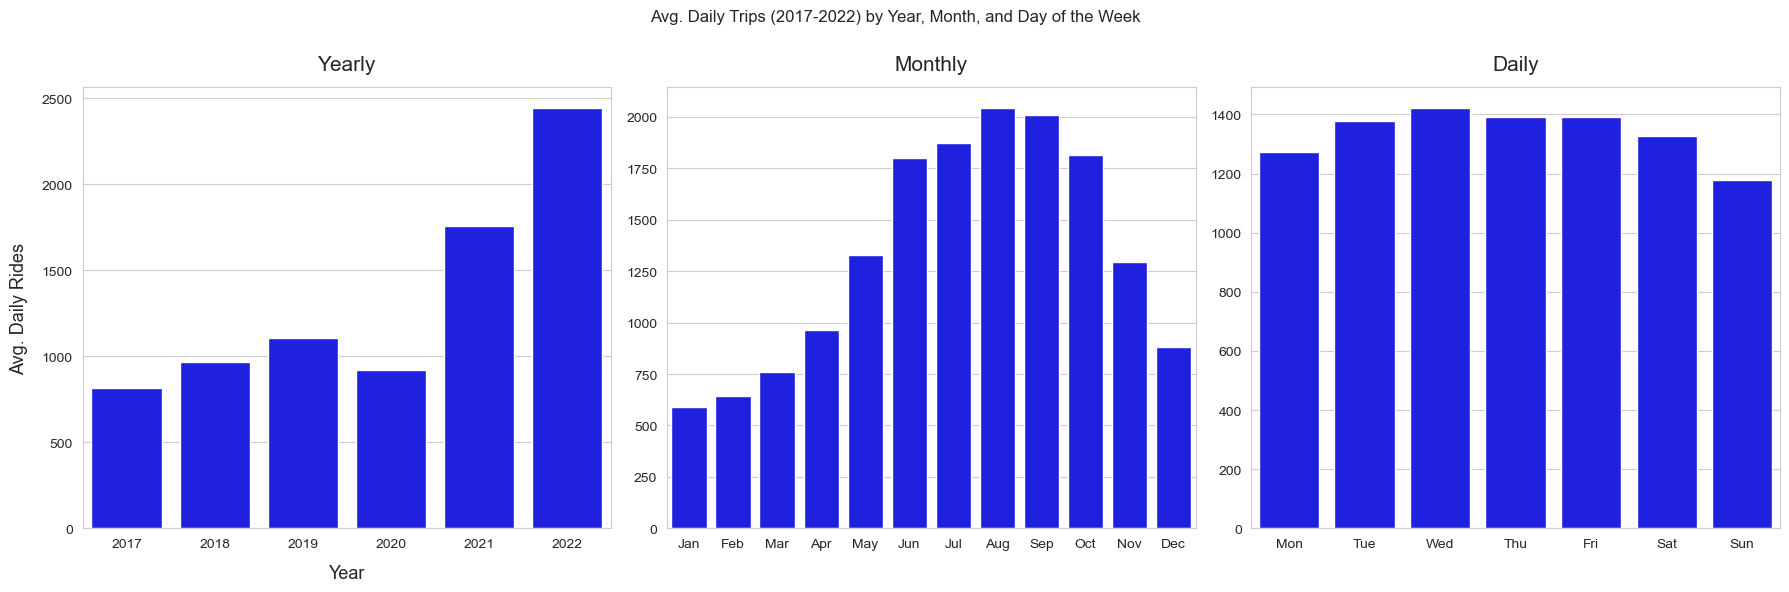

In [55]:
import calendar
# Filter the data for years 2017-2022
df_c = df_c[df_c["Year"].between(2017, 2022)]

# Group and calculate mean by different time units
annual_avg = df_c.groupby(["Year"]).mean().reset_index()
monthly_avg = df_c.groupby(["Month"]).mean().reset_index()
weekday_avg = df_c.groupby(["Day of Week"]).mean().reset_index()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
fig.suptitle("Avg. Daily Trips (2017-2022) by Year, Month, and Day of the Week")

# Define month and weekday abbreviations
month_names = [calendar.month_abbr[i] for i in range(1,13)]
weekday_names = [calendar.day_abbr[i] for i in range(0,7)]

# Plot data using seaborn bar plots
sns.barplot(x=annual_avg["Year"], y=annual_avg["count"], ax=axes[0], color="blue")
axes[0].set_title("Yearly")
axes[0].set_ylabel("Avg. Daily Rides")

sns.barplot(x=month_names, y=monthly_avg["count"], ax=axes[1], color="blue")
axes[1].set_title("Monthly")
axes[1].set_ylabel("")

sns.barplot(x=weekday_names, y=weekday_avg["count"], ax=axes[2], color="blue")
axes[2].set_title("Daily")
axes[2].set_ylabel("")

plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust title position
plt.show()

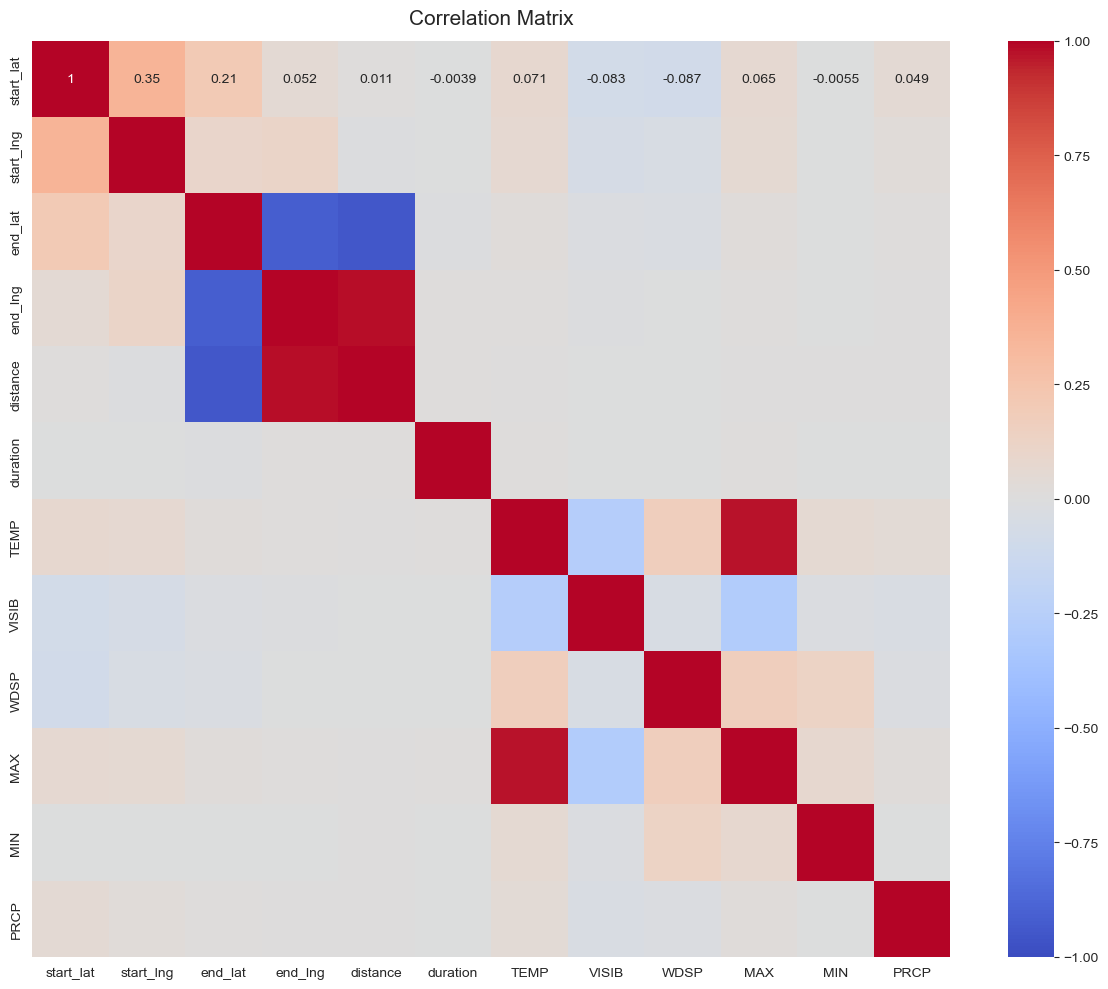

In [56]:
# Select only numeric columns for the correlation matrix
numeric_df = merged_df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [57]:
merged_df.drop(columns=['TEMP'],inplace=True)

Filtering data for only Jersy City stations

In [ ]:
jc_stations = ['JC102', 'JC096', 'JC0003', 'JC099', 'JC023', 'JC081', 'JC075', 'JC078', 'JC063', 'JC080', 'JC072', 'JC013', 'JC002', 'JC076', 'JC032', 'JC027', 'JC009', 'JC105', 'JC053', 'JC093', 'JC020', 'JC094', 'JC056', 'JC103', 'JC038', 'JC006', 'JC104', 'JC008', 'JC0084', 'JC065', 'JC024', 'JC059', 'JC0011', 'JC0035', 'JC005', 'JC082', 'JC074', 'JC055', 'JC022', 'JC106', 'JC014', 'JC098', 'JC066', 'JC052', 'JC051', 'JC077', 'JC0095', 'JC019', 'JC018', 'JC0034', 'JC057']

In [ ]:
new_df = merged_df[(merged_df['start_station_id'].isin(jc_stations)) & (merged_df['end_station_id'].isin(jc_stations))]

In [ ]:
unique_start_station_count = new_df['end_station_id'].nunique()
print(unique_start_station_count)

45


In [ ]:
max_sdatetime = merged_df['started_at'].max()
min_sdatetime = merged_df['started_at'].min()

print("Maximum start datetime:", max_sdatetime)
print("Minimum start datetime:", min_sdatetime)

max_edatetime = merged_df['ended_at'].max()
min_edatetime = merged_df['ended_at'].min()

print("Maximum end datetime:", max_edatetime)
print("Minimum end datetime:", min_edatetime)

Maximum start datetime: 2023-09-30 23:59:34
Minimum start datetime: 2017-01-01 00:21:32
Maximum end datetime: 2023-10-01 05:08:11
Minimum end datetime: 2017-01-01 00:24:01


In [ ]:
max_sdatetime = new_df['started_at'].max()
min_sdatetime = new_df['started_at'].min()

print("Maximum start datetime:", max_sdatetime)
print("Minimum start datetime:", min_sdatetime)

max_edatetime = new_df['ended_at'].max()
min_edatetime = new_df['ended_at'].min()

print("Maximum end datetime:", max_edatetime)
print("Minimum end datetime:", min_edatetime)

Maximum start datetime: 2023-09-30 23:55:43
Minimum start datetime: 2021-02-03 12:27:44
Maximum end datetime: 2023-10-01 05:08:11
Minimum end datetime: 2021-02-03 12:57:30


Before 2021, JC station_id's were named different. so now we have data only for days after 2021-02-03 

In [ ]:
new_df.to_pickle("JC_Data_21to23.pkl")